In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# Importing more modules
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [3]:
# Loading the data
mytrain = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
mytrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Getting features and a label
X = mytrain.drop(['label'], axis=1)
Y = mytrain['label']
# Reshaping and rescaling the features
X = X.values.reshape(-1, 28, 28, 1)
X = X/255.0
# Splitting into train and test sets
x_train,x_test1,y_train,y_test1 = train_test_split(X,Y,test_size = 0.2)

In [5]:
# Creating the model
model = Sequential()
model.add(Conv2D(input_shape = (28, 28, 1),
                 filters=32,activation='relu', 
                 kernel_size=(3,3),padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=48,activation='relu', 
                 kernel_size=(3,3),padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,activation='relu', 
                 kernel_size=(3,3),padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=96,activation='relu', 
                 kernel_size=(3,3),padding='same'
                 ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [7]:
model.compile(optimizer=SGD(learning_rate=0.06), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [8]:
history = model.fit(x_train, y_train, batch_size=1000,
                    validation_data=(x_test1, y_test1), 
                    steps_per_epoch=len(x_train)/1000,
                    epochs=75)

Epoch 1/75
33/33 [==============================] - 27s 770ms/step - loss: 2.2936 - accuracy: 0.1656 - val_loss: 2.2827 - val_accuracy: 0.2108
Epoch 2/75
33/33 [==============================] - 25s 740ms/step - loss: 2.2626 - accuracy: 0.2501 - val_loss: 2.2322 - val_accuracy: 0.2317
Epoch 3/75
33/33 [==============================] - 25s 745ms/step - loss: 2.1798 - accuracy: 0.3018 - val_loss: 2.0472 - val_accuracy: 0.3083
Epoch 4/75
33/33 [==============================] - 25s 745ms/step - loss: 2.0881 - accuracy: 0.3124 - val_loss: 1.8119 - val_accuracy: 0.4877
Epoch 5/75
33/33 [==============================] - 25s 750ms/step - loss: 1.7945 - accuracy: 0.4172 - val_loss: 1.4187 - val_accuracy: 0.5417
Epoch 6/75
33/33 [==============================] - 25s 748ms/step - loss: 1.4393 - accuracy: 0.5257 - val_loss: 1.1922 - val_accuracy: 0.6205
Epoch 7/75
33/33 [==============================] - 25s 732ms/step - loss: 1.0046 - accuracy: 0.6742 - val_loss: 1.0291 - val_accuracy: 0.6602

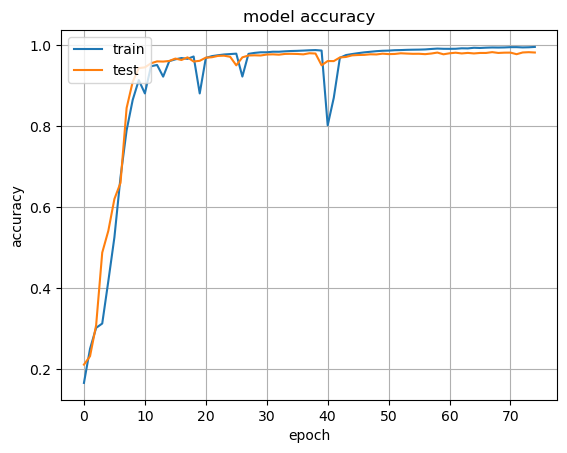

In [9]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

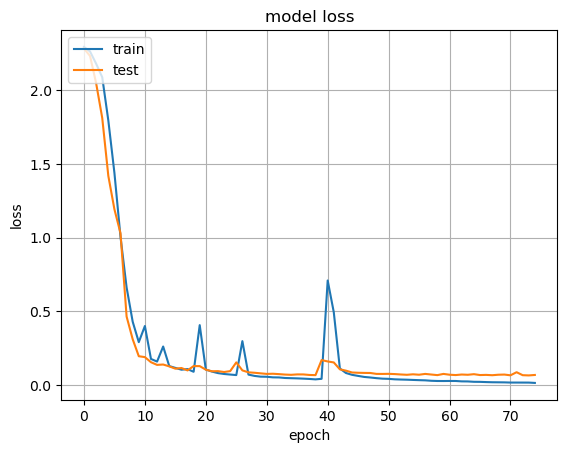

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [11]:
path_test = "/kaggle/input/digit-recognizer/test.csv"
mytest = pd.read_csv(path_test)
x_test2 = mytest.to_numpy()
x_test2 = x_test2/.255 
x_test2 = np.array(x_test2).reshape(x_test2.shape[0], 28, 28, 1)

In [12]:
y_pred = model.predict(x_test2)
preds_test = np.argmax(y_pred,axis = 1)

sample_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
test_id = sample_sub.ImageId.copy()

results = pd.Series(preds_test,name="Label")
output = pd.DataFrame({'ImageId': test_id,
                       'Label': preds_test})

output.to_csv('submission.csv', index=False)

875/875 [==============================] - 7s 8ms/step
